In [4]:
%pip install numpy
%pip install matplotlib
%pip install scipy
%pip install pandas
%pip install scikit-learn
%pip install seaborn
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
#from fbprophet import Prophet


In [28]:
data = pd.read_csv('dataset\\pizza_sales_updated.csv')

# Top-10 Meistverkaufte Pizza (pizza_name)

Meistverkaufte Pizza: The Classic Deluxe Pizza
Anzahl der meistverkauften Pizza: 2453.0
Schlechteste Pizza: The Brie Carre Pizza
Anzahl der schlechteste Pizza: 490.0


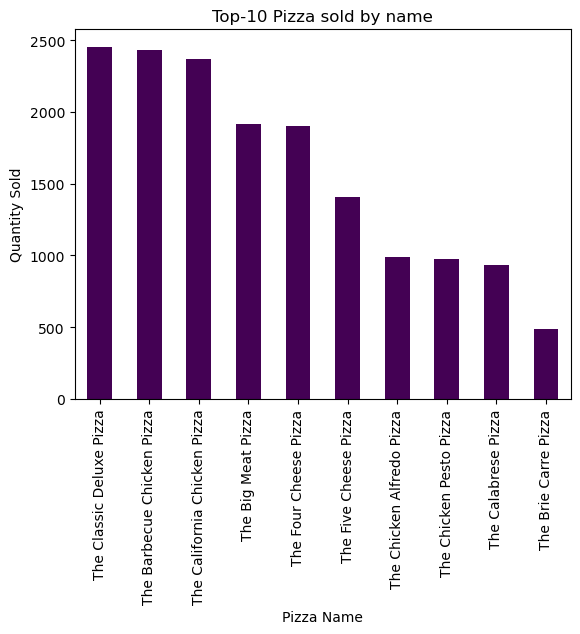

In [59]:
# Top-10 Pizzen nach Anzahl verkaufter Stücke
pizza_name = data.groupby("pizza_name")["quantity"].sum()
top10_pizza = pizza_name.head(10).sort_values(ascending=False)


# Meistverkaufteste Pizza
meistverkaufte_pizza = pizza_name.idxmax()
anzahl_meistverkaufte_pizza = pizza_name.max()
schlechteste_pizza = pizza_name.idxmin()
anzahl_schlechteste_pizza = pizza_name.min()


print("Meistverkaufte Pizza:", meistverkaufte_pizza)
print("Anzahl der meistverkauften Pizza:", anzahl_meistverkaufte_pizza)
print("Schlechteste Pizza:", schlechteste_pizza)
print("Anzahl der schlechteste Pizza:", anzahl_schlechteste_pizza)

top10_pizza.plot(kind='bar', title='Top-10 Pizza sold by name', cmap='viridis')
plt.xlabel('Pizza Name')
plt.ylabel('Quantity Sold')
plt.show()


# Pizzen mit Sizeverteilung

C:\Users\milia\AppData\Local\Temp\ipykernel_23864\178282695.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pizza_size_count = data.groupby(['pizza_name', 'pizza_size']).sum()['quantity'].unstack(fill_value=0)


<Axes: title={'center': 'Top-10 Pizza sold by size'}, xlabel='pizza_name'>

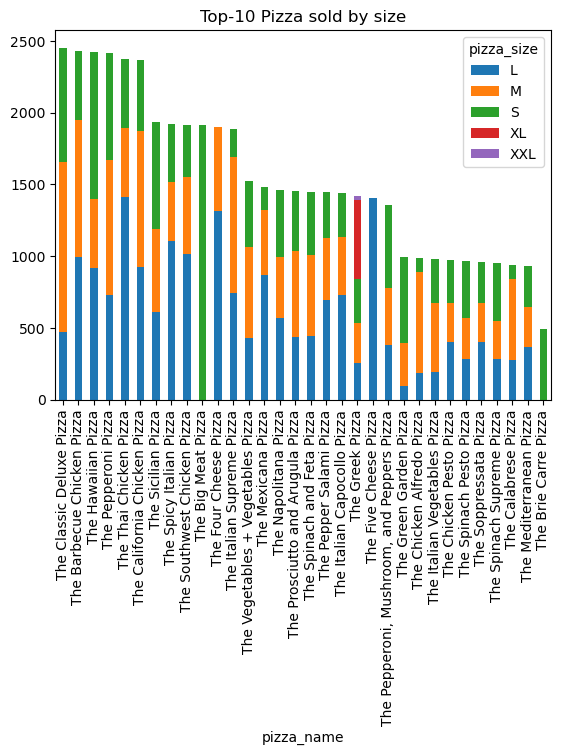

In [8]:
pizza_total_quantity = data.groupby('pizza_name')['quantity'].sum().sort_values(ascending=False).index # Für Top-10 -> :10
pizza_size_count = data.groupby(['pizza_name', 'pizza_size']).sum()['quantity'].unstack(fill_value=0)
pizza_size_count.loc[pizza_total_quantity].plot(kind='bar', stacked=True, title='Top-10 Pizza sold by size')


# Welche Pizzagrößen werden wie oft gekauft?
Die Leute in Amerika lieben Large

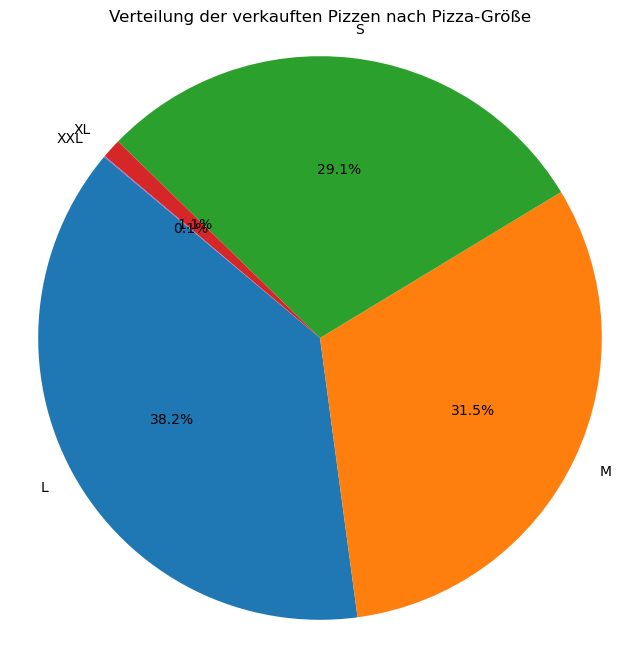

In [9]:
# Anzahl der verkauften Pizzen für jede Pizza-Größe berechnen
pizza_sales = data.groupby('pizza_size')['quantity'].sum()

# Plot erstellen
plt.figure(figsize=(8, 8))
plt.pie(pizza_sales, labels=pizza_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Verteilung der verkauften Pizzen nach Pizza-Größe')

# Plot anzeigen
plt.axis('equal')
plt.show()

# Top-10 pizzen nach Größe

pizza_name
The Classic Deluxe Pizza        2453.0
The Barbecue Chicken Pizza      2432.0
The Hawaiian Pizza              2422.0
The Pepperoni Pizza             2418.0
The Thai Chicken Pizza          2371.0
The California Chicken Pizza    2370.0
The Sicilian Pizza              1938.0
The Spicy Italian Pizza         1924.0
The Southwest Chicken Pizza     1917.0
The Big Meat Pizza              1914.0
Name: quantity, dtype: float64


C:\Users\milia\AppData\Local\Temp\ipykernel_23864\3088523609.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pizza_by_size = data.groupby(['pizza_name', 'pizza_size']).sum()['quantity']


<Figure size 1200x800 with 0 Axes>

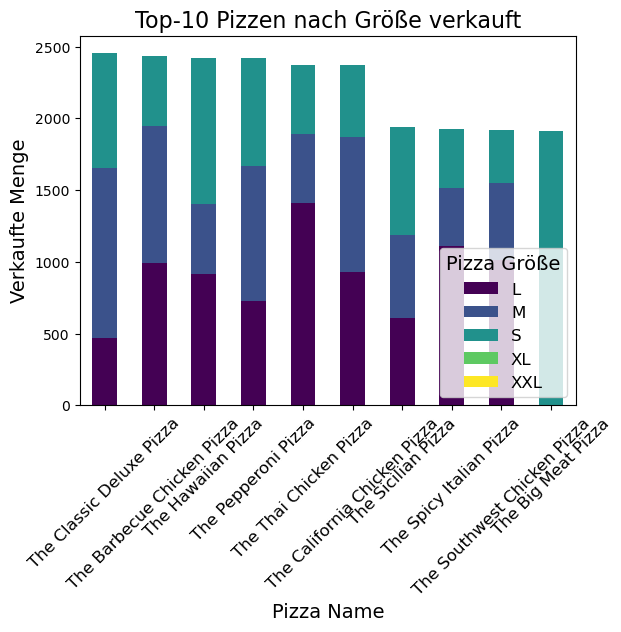

In [58]:
pizza_by_size = data.groupby(['pizza_name', 'pizza_size']).sum()['quantity']
top_10_pizza_size = pizza_by_size.groupby('pizza_name').sum().nlargest(10)
print(top_10_pizza_size)

plt.figure(figsize=(12, 8))
pizza_by_size.unstack().loc[top_10_pizza_size.index].plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Top-10 Pizzen nach Größe verkauft', fontsize=16)
plt.xlabel('Pizza Name', fontsize=14)
plt.ylabel('Verkaufte Menge', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Pizza Größe', fontsize=12, title_fontsize=14)
plt.show()

# Meist verkaufte Pizza an einem Tag

Datum und Name der meistverkauften Pizza an einem Tag: ('2015-11-26', 'The Hawaiian Pizza')
Anzahl der meistverkauften Pizza an diesem Tag: 22.0


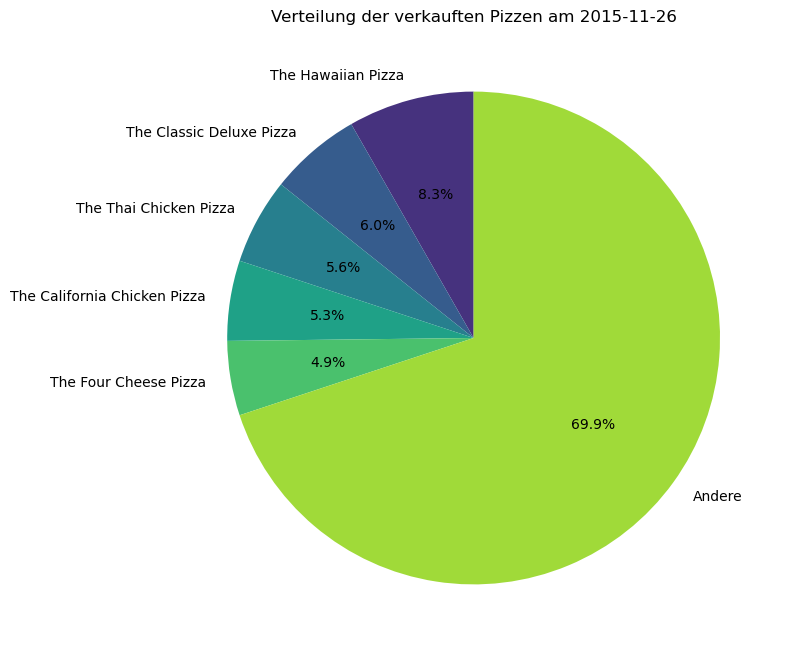

In [34]:
date = data.groupby(['order_date', 'pizza_name'])['quantity'].sum()
date_max = date.idxmax()
anzahl_date_max = date.max()
print("Datum und Name der meistverkauften Pizza an einem Tag:", date_max)
print("Anzahl der meistverkauften Pizza an diesem Tag:", anzahl_date_max)

top_pizza_data = data[(data['order_date'] == date_max[0]) & (data['pizza_name'] == date_max[1])]

# Gruppiere die Daten nach Pizza und summiere die Mengen für das Datum der meistverkauften Pizza
pizza_quantity_per_day = data[data['order_date'] == date_max[0]].groupby('pizza_name')['quantity'].sum()

# Sortiere die Pizzen nach Verkaufsmenge und wähle die Top 5
top_5_pizzas = pizza_quantity_per_day.nlargest(5)
other_pizzas = pizza_quantity_per_day.drop(top_5_pizzas.index).sum()

# Füge "Andere" zu den Top 5 Pizzen hinzu
top_5_pizzas['Andere'] = other_pizzas

# Erstelle eine einfache Tortengrafik
plt.figure(figsize=(10, 8))
plt.pie(
    top_5_pizzas, 
    labels=top_5_pizzas.index, 
    autopct='%1.1f%%', 
    startangle=90,
    colors=sns.color_palette('viridis', len(top_5_pizzas))
)
plt.title(f"Verteilung der verkauften Pizzen am {date_max[0]}")
plt.show()

# Top-10 Umsatzstärkste Pizzen
Wie viel Geld geben die Leute für welche Pizza aus?
Antwort: The Thai Chicken Pizza. Lohnt sich wohl mehr für den Preis


pizza_name
The Thai Chicken Pizza          43434.25
The Barbecue Chicken Pizza      42768.00
The California Chicken Pizza    41409.50
The Classic Deluxe Pizza        38180.50
The Spicy Italian Pizza         34831.25
The Southwest Chicken Pizza     34705.75
The Italian Supreme Pizza       33476.75
The Hawaiian Pizza              32273.25
The Four Cheese Pizza           32265.70
The Sicilian Pizza              30940.50
Name: total_price, dtype: float64


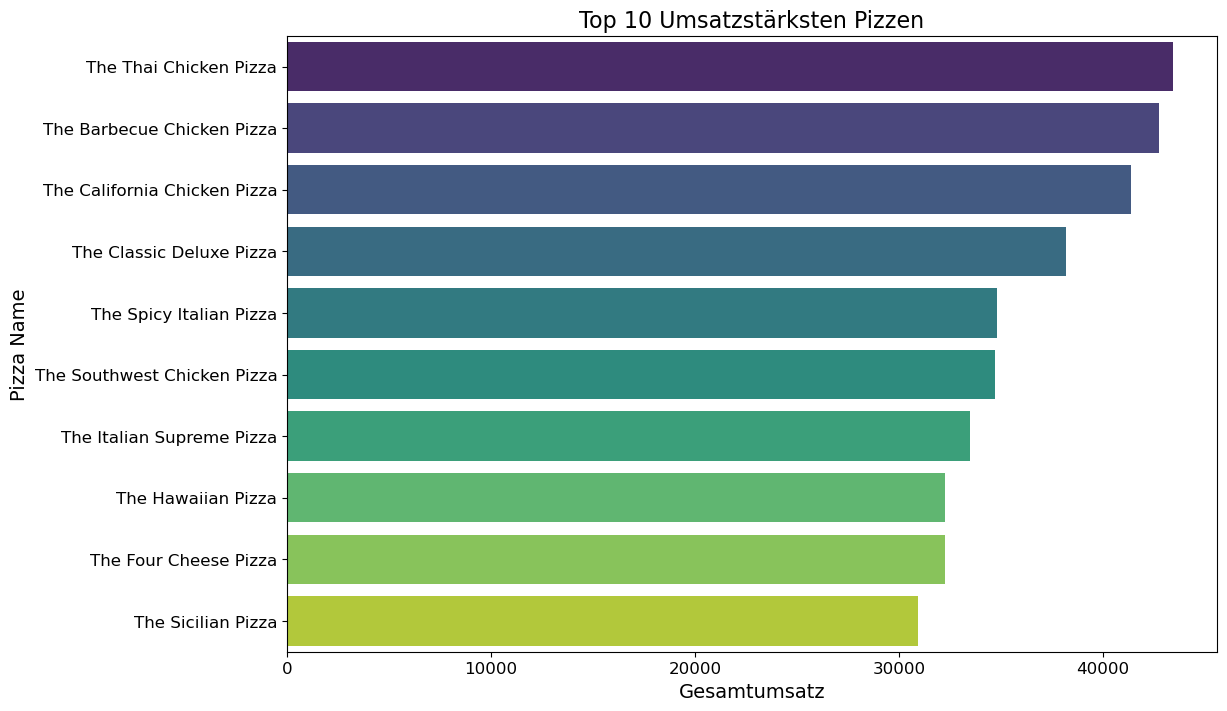

In [38]:
total_price = data.groupby('pizza_name')['total_price'].sum()
top_10_total_price = total_price.sort_values(ascending=False).head(10)
print(top_10_total_price)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_total_price.values, y=top_10_total_price.index, palette='viridis')
plt.title('Top-10 Umsatzstärksten Pizzen', fontsize=16)
plt.xlabel('Gesamtumsatz', fontsize=14)
plt.ylabel('Pizza Name', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Hat der Preis der Pizzen einen Einfluss auf den Kauf?
The Big Meat Pizza ist wahrscheinlich die Preis-Leistungs Kanone

                     pizza_name  unit_price  quantity
3            The Big Meat Pizza       12.00    1914.0
87       The Thai Chicken Pizza       20.75    1410.0
20        The Five Cheese Pizza       18.50    1409.0
22        The Four Cheese Pizza       17.95    1316.0
18     The Classic Deluxe Pizza       16.00    1181.0
75      The Spicy Italian Pizza       20.75    1109.0
31           The Hawaiian Pizza       10.50    1020.0
72  The Southwest Chicken Pizza       20.75    1016.0
2    The Barbecue Chicken Pizza       20.75     992.0
1    The Barbecue Chicken Pizza       16.75     956.0


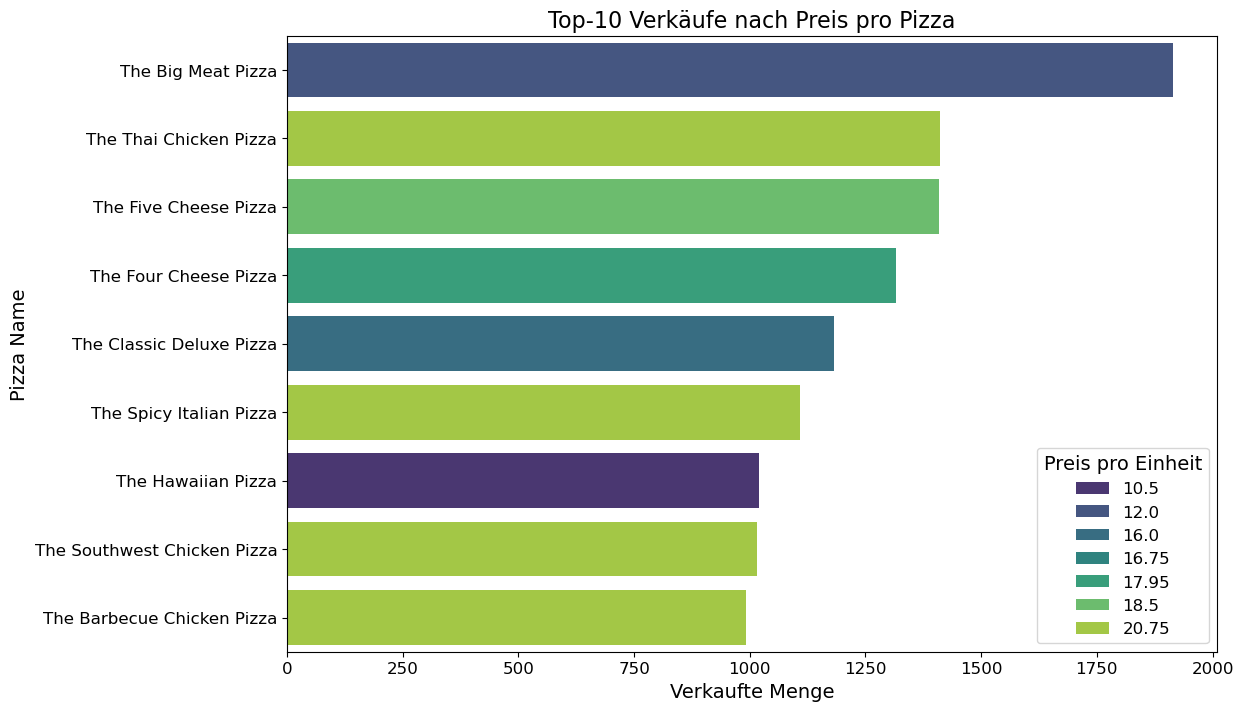

In [44]:
unit_price = data.groupby(['pizza_name', 'unit_price'])['quantity'].sum().reset_index()
top_10_unit_price = unit_price.sort_values(by='quantity', ascending=False).head(10)
print(top_10_unit_price)

plt.figure(figsize=(12, 8))
sns.barplot(x='quantity', y='pizza_name', hue='unit_price', data=top_10_unit_price, palette='viridis', dodge=False)
plt.title('Top-10 Verkäufe nach Preis pro Pizza', fontsize=16)
plt.xlabel('Verkaufte Menge', fontsize=14)
plt.ylabel('Pizza Name', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Preis pro Einheit', fontsize=12, title_fontsize=14)
plt.show()

# Welche Uhrzeit ist die Verkaufsstärkste

Verkaufsstärkste Zeit: 12:25:12
Anzahl der verkauften Pizzen zur verkaufsstärksten Zeit: 28.0


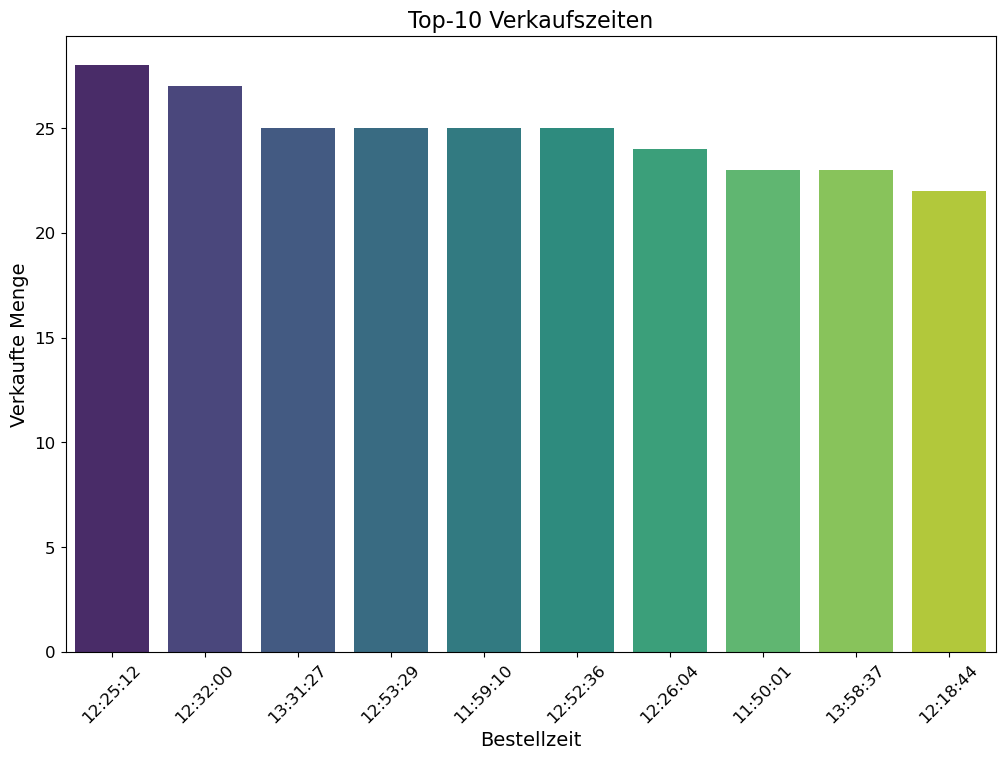

In [45]:
# Gesammt
best_sales_time = data.groupby('order_time')['quantity'].sum()
# 10 best sales time
top10_sales_time = best_sales_time.sort_values(ascending=False).head(10)
verkaufsstärkste_zeit = best_sales_time.idxmax()
anzahl_verkaufsstärkste_zeit = best_sales_time.max()

print(f"Verkaufsstärkste Zeit: {verkaufsstärkste_zeit}")
print(f"Anzahl der verkauften Pizzen zur verkaufsstärksten Zeit: {anzahl_verkaufsstärkste_zeit}")

plt.figure(figsize=(12, 8))
sns.barplot(x=top10_sales_time.index, y=top10_sales_time.values, palette='viridis')
plt.title('Top-10 Verkaufszeiten', fontsize=16)
plt.xlabel('Bestellzeit', fontsize=14)
plt.ylabel('Verkaufte Menge', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Wann Uhrzeit muss ich meine Pizza bestellen um die kürzeste Wartezeit zu haben? (Stunde, und in der gesammten Zeit)

Verkaufsstärkste Stunde: 12
Anzahl der verkauften Pizzen in der stärksten Stunde: 6776.0
Verkaufsschwächste Stunde: 9
Anzahl der verkauften Pizzen in der schwächsten Stunde: 4.0


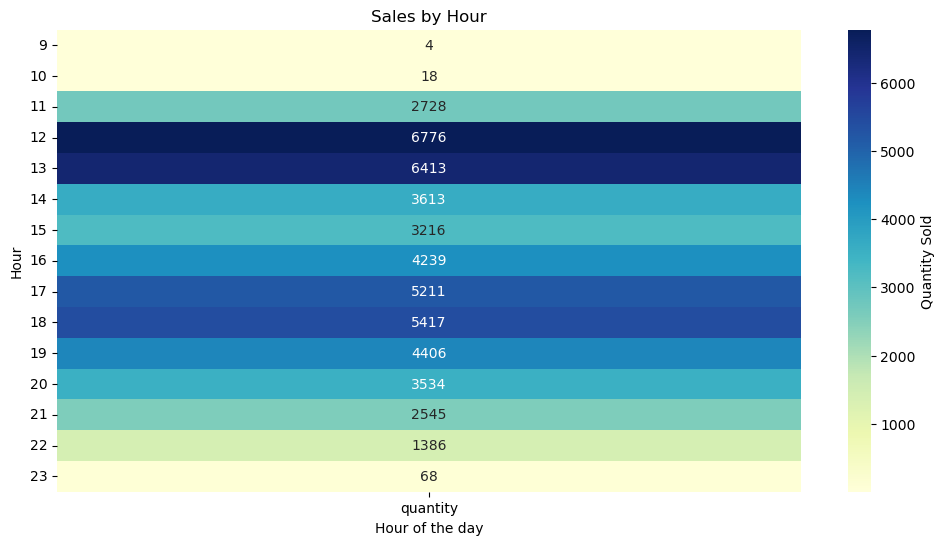

In [15]:
data['order_time'] = pd.to_datetime(data['order_time'])
sales_by_hour = data.groupby(data['order_time'].dt.hour)['quantity'].sum()

verkaufsschwächste_stunde = sales_by_hour.idxmin()
anzahl_verkaufsschwächste_stunde = sales_by_hour.min()
verkaufsstärkste_stunde = sales_by_hour.idxmax()
anzahl_verkaufsstärkste_stunde = sales_by_hour.max()

print("Verkaufsstärkste Stunde:", verkaufsstärkste_stunde)
print("Anzahl der verkauften Pizzen in der stärksten Stunde:", anzahl_verkaufsstärkste_stunde)

print("Verkaufsschwächste Stunde:", verkaufsschwächste_stunde)
print("Anzahl der verkauften Pizzen in der schwächsten Stunde:", anzahl_verkaufsschwächste_stunde)

# Plot als Heatmap für die Verkaufszeiten nach Stunden
plt.figure(figsize=(12, 6))
sns.heatmap(pd.DataFrame(sales_by_hour), annot=True, fmt='.0f', cmap="YlGnBu", cbar_kws={'label': 'Quantity Sold'})
plt.title('Sales by Hour')
plt.xlabel('Hour of the day')
plt.ylabel('Hour')
plt.yticks(rotation=0)
plt.show()


# Top-10: Welcher Tag ist am Verkaufsstärksten
evtl. Feiertage...
1. Thanksgiving, 2. - , 4. Independence Day ...

   order_date  quantity                         holiday
0  2015-11-26     266.0                    Thanksgiving
1  2015-11-27     264.0                    Thanksgiving
2  2015-10-15     262.0                                
3  2015-07-04     234.0  4th of July (Independence Day)
4  2015-07-03     213.0                                
5  2015-05-15     208.0                                
6  2015-07-24     196.0                                
7  2015-10-01     194.0                                
8  2015-02-01     191.0                                
9  2015-11-06     190.0                                


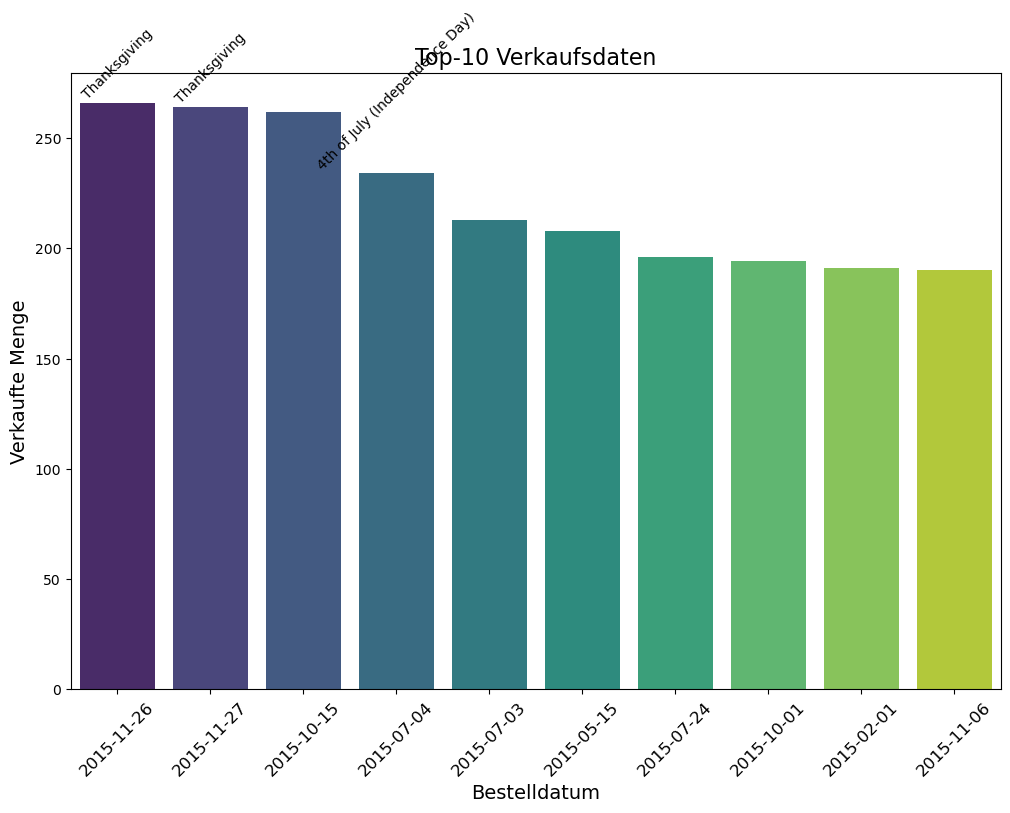

In [51]:
best_sales_date = data.groupby('order_date')['quantity'].sum()
top10_sales_date = best_sales_date.sort_values(ascending=False).head(10)

holiday_names = {
    '2015-11-26': 'Thanksgiving',
    '2015-11-27': 'Thanksgiving',
    '2015-07-04': '4th of July (Independence Day)',
    '2015-12-25': 'Christmas Day',
}
def map_holidays(date):
    return holiday_names.get(date, '')


# Erstelle eine neue Spalte für die Feiertagsnamen
top10_sales_date = top10_sales_date.reset_index()
top10_sales_date['holiday'] = top10_sales_date['order_date'].astype(str).map(map_holidays)

# Ausgabe der Top 10 Verkaufsdaten mit Feiertagsnamen
print(top10_sales_date)

# Erstelle eine ansprechende Balkengrafik
plt.figure(figsize=(12, 8))
sns.barplot(x='order_date', y='quantity', data=top10_sales_date, palette='viridis')
plt.title('Top-10 Verkaufsdaten', fontsize=16)
plt.xlabel('Bestelldatum', fontsize=14)
plt.ylabel('Verkaufte Menge', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

# Feiertagsnamen als Beschriftungen hinzufügen
for i in range(len(top10_sales_date)):
    plt.text(i, top10_sales_date['quantity'][i] + 0.5, top10_sales_date['holiday'][i], 
             ha='center', va='bottom', fontsize=10, color='black', rotation=45)

plt.show()

# Gesamtverkäufe im Laufe der Zeit

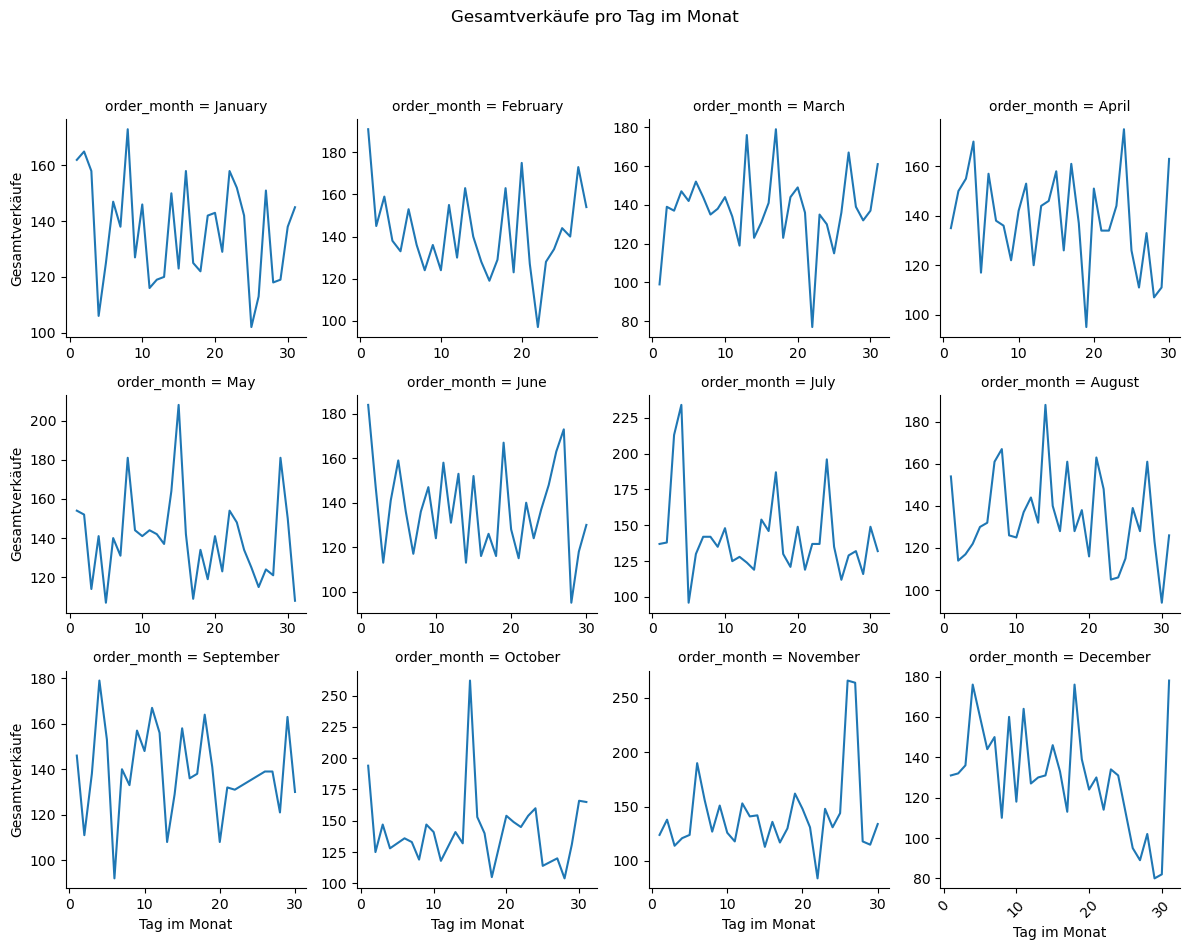

In [17]:
# 'order_date' in Datetime-Objekte umwandeln
data['order_date'] = pd.to_datetime(data['order_date'])

# Gesamtverkäufe pro Tag berechnen
total_sales_per_day = data.groupby('order_date')['quantity'].sum().reset_index(name='total_sales')

# 'order_month' und 'day_in_month' Spalten hinzufügen
total_sales_per_day['order_month'] = total_sales_per_day['order_date'].dt.month_name()
total_sales_per_day['day_in_month'] = total_sales_per_day['order_date'].dt.day

# Plot erstellen
g = sns.relplot(
    data=total_sales_per_day, 
    x="day_in_month", y="total_sales",
    kind="line", col="order_month",
    col_wrap=4, height=3,
    facet_kws={'sharey': False, 'sharex': False}
)

# Achsenbeschriftungen und Titel hinzufügen
g.set_axis_labels("Tag im Monat", "Gesamtverkäufe")
g.fig.suptitle('Gesamtverkäufe pro Tag im Monat', y=1.05)

# X-Achsenlabels drehen, um Platz zu sparen
plt.xticks(rotation=45)

# Plot anzeigen
plt.tight_layout()
plt.show()

# Gesamtumsatz in für jeden Monat

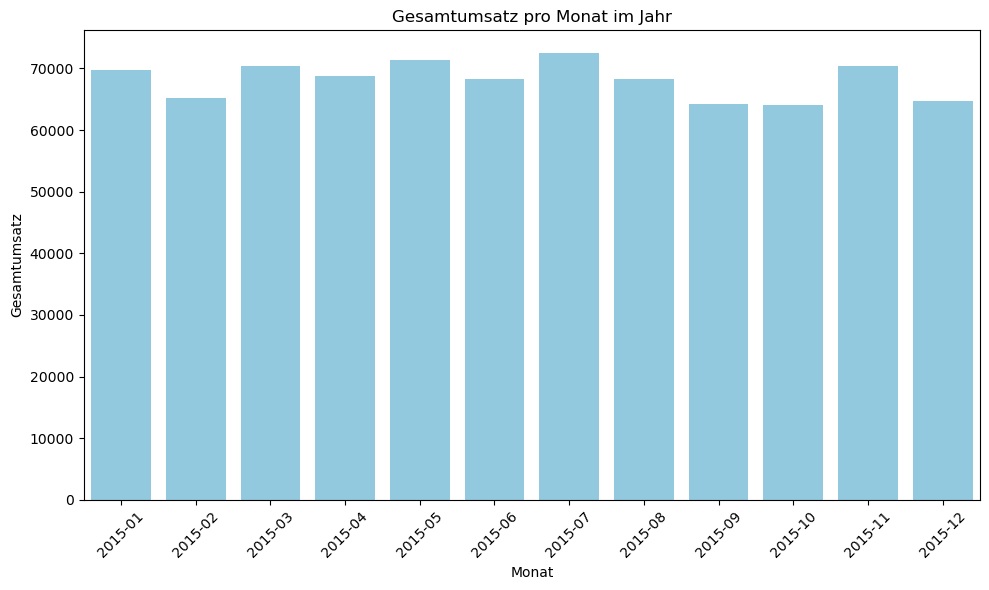

In [18]:
# Gesamtumsatz pro Monat berechnen
data['order_date'] = pd.to_datetime(data['order_date'])
data['order_month'] = data['order_date'].dt.to_period('M')
total_revenue_per_month = data.groupby('order_month')['total_price'].sum().reset_index(name='total_revenue')

# Plot erstellen
plt.figure(figsize=(10, 6))
sns.barplot(data=total_revenue_per_month, x='order_month', y='total_revenue', color='skyblue')

# Achsenbeschriftungen und Titel hinzufügen
plt.xlabel('Monat')
plt.ylabel('Gesamtumsatz')
plt.title('Gesamtumsatz pro Monat im Jahr')

# X-Achsenlabels drehen, um Platz zu sparen
plt.xticks(rotation=45)

# Plot anzeigen
plt.tight_layout()
plt.show()

# Wie häufig tritt die "Anzahl" der Bestellungen auf?
Verteilung der Bestellungen. Wurden 1 oder mehrere Pizzen gekauft? Wie häufig treten die  anzahl der Bestellungen auf

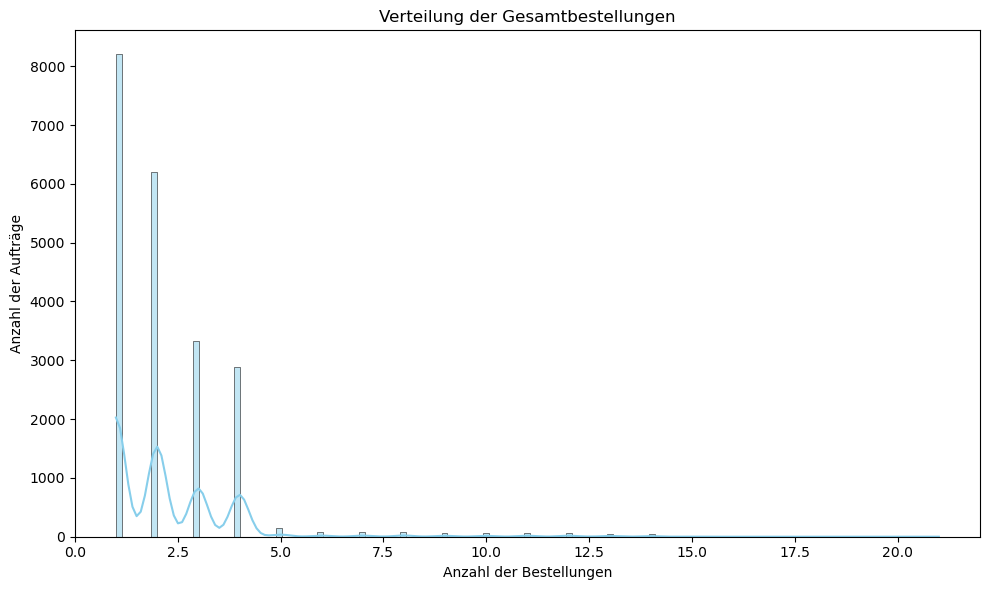

In [19]:
# Gesamtbestellungen pro order_id berechnen
total_orders = data['order_id'].value_counts().reset_index(name='total_orders')
total_orders.columns = ['order_id', 'total_orders']

# Plot erstellen
plt.figure(figsize=(10, 6))
sns.histplot(total_orders['total_orders'], kde=True, color='skyblue')

# Achsenbeschriftungen und Titel hinzufügen
plt.xlabel('Anzahl der Bestellungen')
plt.ylabel('Anzahl der Aufträge')
plt.title('Verteilung der Gesamtbestellungen')

# Plot anzeigen
plt.tight_layout()
plt.show()

# Anzahl der Artikel der Bestellungen

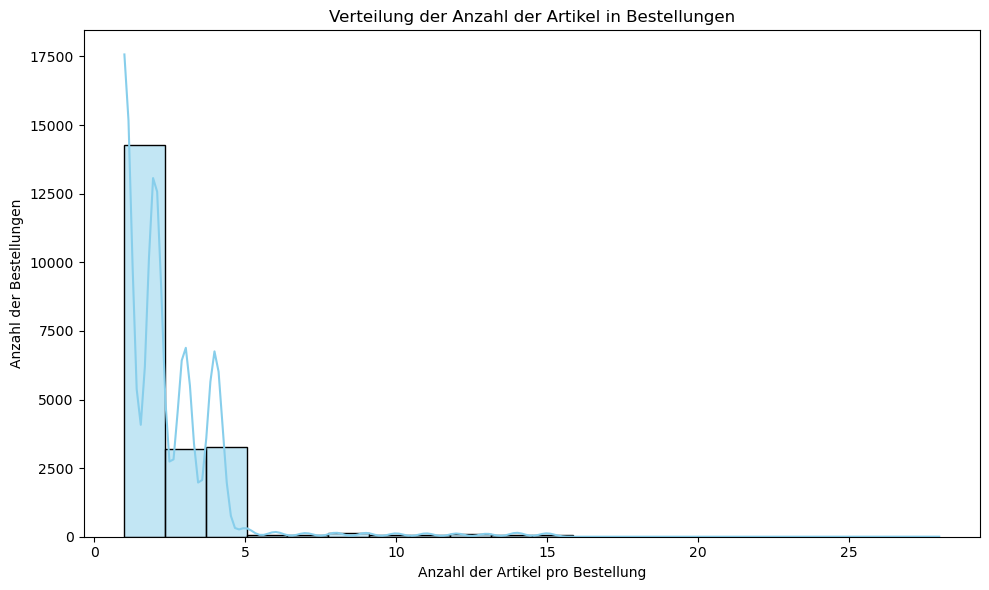

In [20]:
# Gesamtbestellungen pro order_id berechnen
total_orders = data['order_id'].value_counts().reset_index(name='total_orders')
total_orders.columns = ['order_id', 'total_orders']

# Anzahl der Artikel pro Bestellung berechnen
items_per_order = data.groupby('order_id')['quantity'].sum().reset_index(name='total_items')

# Plot erstellen
plt.figure(figsize=(10, 6))
sns.histplot(items_per_order['total_items'], bins=20, kde=True, color='skyblue')

# Achsenbeschriftungen und Titel hinzufügen
plt.xlabel('Anzahl der Artikel pro Bestellung')
plt.ylabel('Anzahl der Bestellungen')
plt.title('Verteilung der Anzahl der Artikel in Bestellungen')

# Plot anzeigen
plt.tight_layout()
plt.show()

# Welche Belege für die Pizzen müssen im schnitt nach welcher Zeit wieder gekauft werden?
Gekauft wird angenommen werden 200 pro Belag

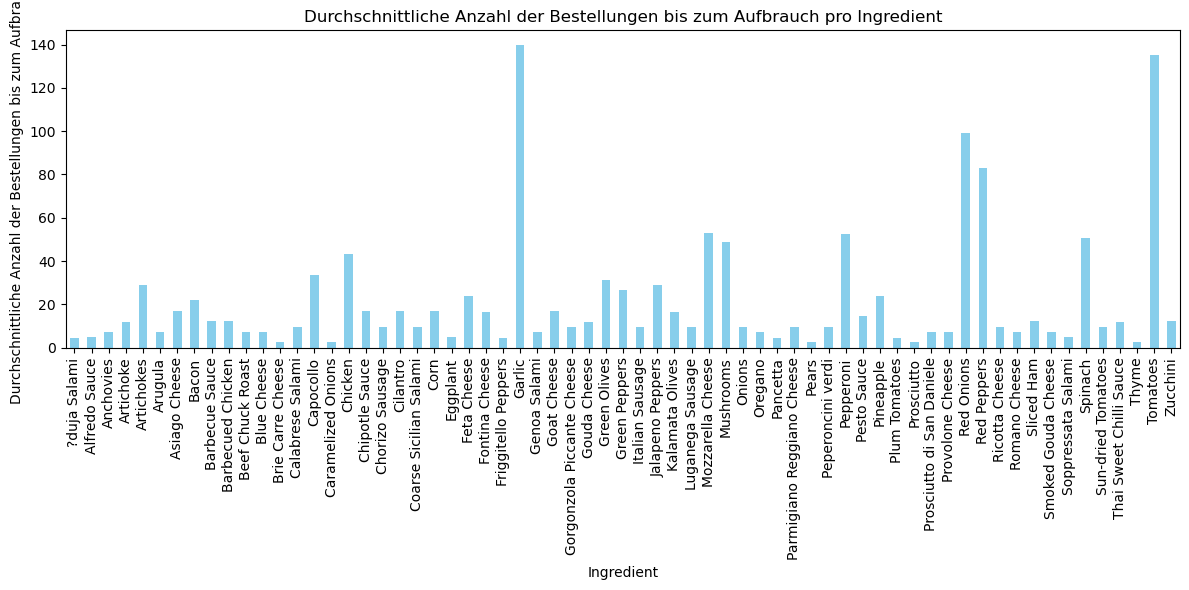

In [21]:
# Annahme: 200 Stück pro Belag von der Pizzafirma gekauft
units_per_topping = 200

# Neue Spalte 'ingredient' erstellen, indem die Zutaten aufgeteilt werden
data['ingredients_list'] = data['pizza_ingredients'].str.split(', ')

# Explodieren der Liste von Zutaten, um jeden Belag zu einem einzelnen Eintrag zu machen
data_exploded = data.explode('ingredients_list')

# Gesamtanzahl der Verkäufe für jedes Ingredient zählen
total_sales_per_ingredient = data_exploded.groupby('ingredients_list')['quantity'].sum()

# Anzahl der Einheiten (Pizzen) für jedes Ingredient berechnen
total_units_per_ingredient = total_sales_per_ingredient / units_per_topping

# Plot erstellen
plt.figure(figsize=(12, 6))
total_units_per_ingredient.plot(kind='bar', color='skyblue')
plt.xlabel('Ingredient')
plt.ylabel('Durchschnittliche Anzahl der Bestellungen bis zum Aufbrauch')
plt.title('Durchschnittliche Anzahl der Bestellungen bis zum Aufbrauch pro Ingredient')
plt.xticks(rotation=90)
plt.tight_layout()

# Plot anzeigen
plt.show()

# Dual Line Plot Gesamtumsatz und Gesamtverkäufe

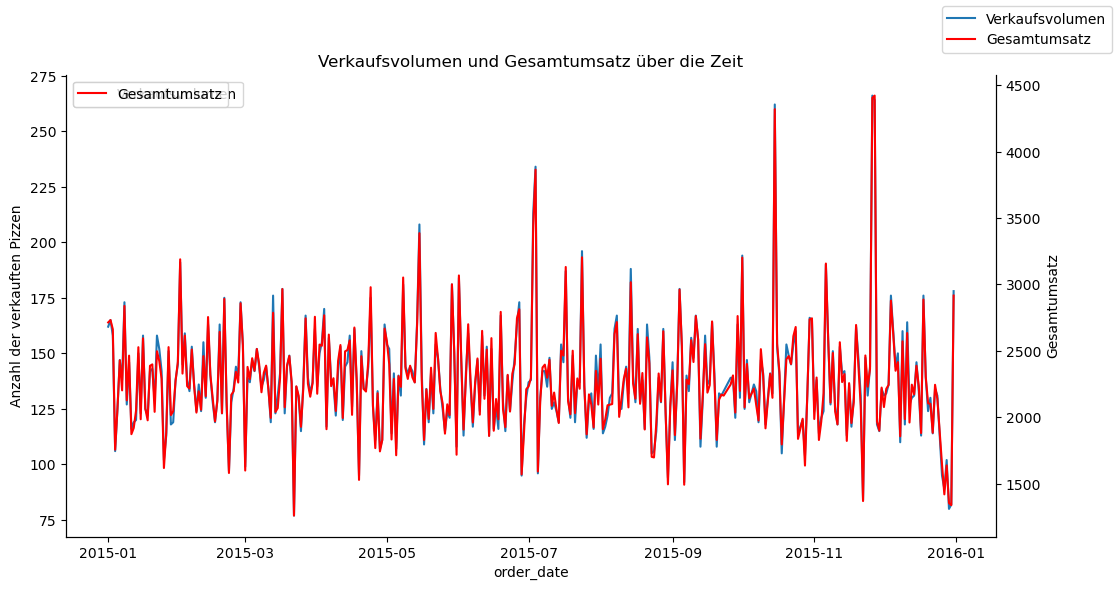

In [22]:
# Konvertieren der 'order_date' in ein DateTime-Objekt
data['order_date'] = pd.to_datetime(data['order_date'])

# Gruppierung nach Datum und Berechnung des Verkaufsvolumens (Anzahl der verkauften Pizzen) und des Gesamtumsatzes
daily_sales = data.groupby('order_date').agg({'quantity': 'sum', 'total_price': 'sum'}).reset_index()

# Figure und Axes erstellen
fig, ax = plt.subplots(figsize=(12, 6))

# Erste Linie für das Verkaufsvolumen
sns.lineplot(x='order_date', y='quantity', data=daily_sales, ax=ax, label='Verkaufsvolumen')

# Zweite Linie für den Gesamtumsatz
ax2 = ax.twinx()  # Zweite y-Achse für den Gesamtumsatz
sns.lineplot(x='order_date', y='total_price', data=daily_sales, ax=ax2, color='r', label='Gesamtumsatz')

# Legende anzeigen
ax.figure.legend()

# Achsenbeschriftungen und Titel
ax.set_ylabel('Anzahl der verkauften Pizzen')
ax2.set_ylabel('Gesamtumsatz')
plt.title('Verkaufsvolumen und Gesamtumsatz über die Zeit')

# Anpassen der Layouts
sns.despine(right=False)

# Plot anzeigen
plt.show()

# Clustering

C:\Users\milia\AppData\Local\Temp\ipykernel_23864\62271678.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(data.groupby('cluster').mean())


             pizza_id      order_id  quantity  unit_price  total_price
cluster                                                               
0        24339.738415  10714.487983  1.000000   14.178612    14.178612
1        24663.681769  10855.985976  2.029126   16.707228    33.875890
2        24241.732426  10671.023450  1.000000   20.453105    20.453105
   quantity  total_price
0  1.000000    14.178612
1  2.029126    33.875890
2  1.000000    20.453105


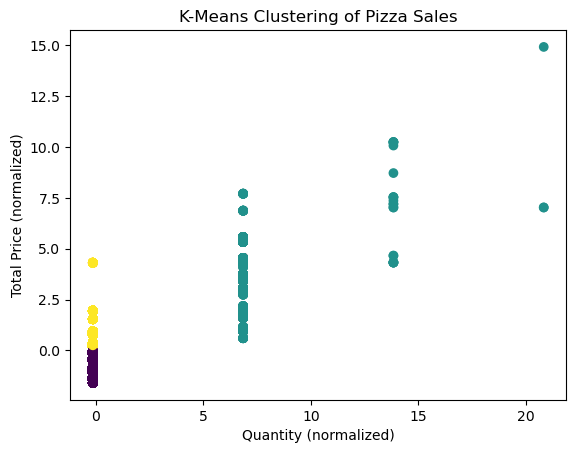

In [23]:
features = data[['quantity', 'total_price']]

# Datenvorverarbeitung: Normalisierung
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Anwendung von K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # Wir wählen hier k=3 für drei Cluster
kmeans.fit(scaled_features)

# Hinzufügen der Cluster-Zuordnung zum DataFrame
data['cluster'] = kmeans.labels_

# Analyse der Cluster
print(data.groupby('cluster').mean())

# Rücktransformation der Cluster-Zentroiden zur Interpretation
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# DataFrame zur besseren Lesbarkeit
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['quantity', 'total_price'])
print(cluster_centers_df)

# Visualisierung der Cluster
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Quantity (normalized)')
plt.ylabel('Total Price (normalized)')
plt.title('K-Means Clustering of Pizza Sales')
plt.show()

# Erstelle Predict 

# Welche Pizza wird an Tag x und Uhrzeit y gekauft?
# Lernkurve

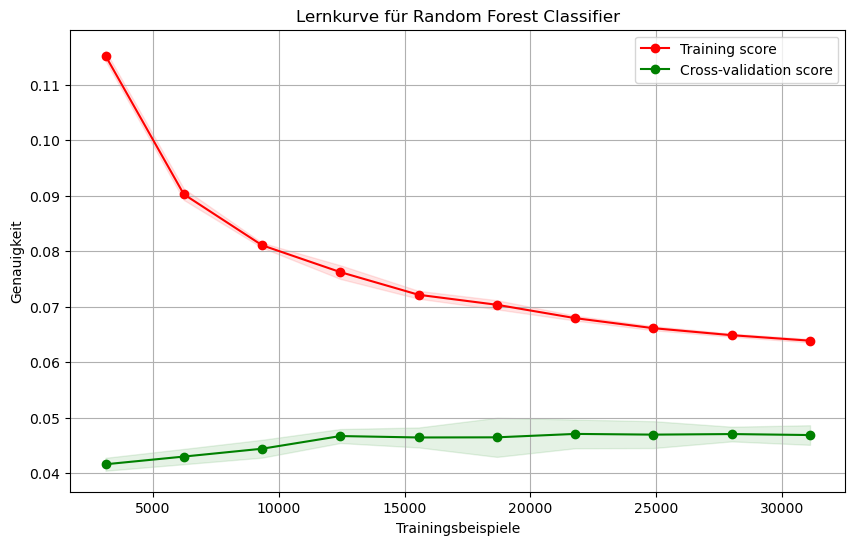

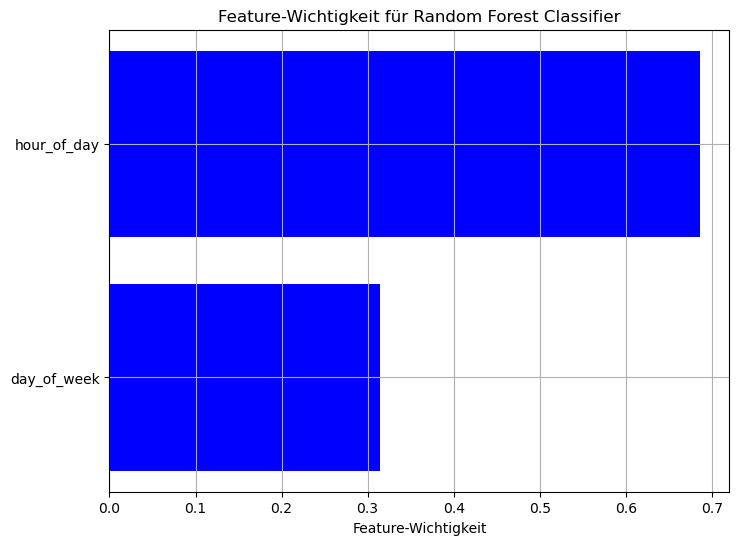

In [24]:
# Konvertieren von Datums- und Zeitangaben
data['order_date'] = pd.to_datetime(data['order_date'])
data['order_time'] = pd.to_datetime(data['order_time'], format='%H:%M:%S').dt.time

# Extrahieren von Merkmalen
data['day_of_week'] = data['order_date'].dt.dayofweek
data['hour_of_day'] = data['order_time'].apply(lambda x: x.hour)

# Zielvariable kodieren
label_encoder = LabelEncoder()
data['pizza_name_encoded'] = label_encoder.fit_transform(data['pizza_name'])

# Merkmale und Zielvariable definieren
features = data[['day_of_week', 'hour_of_day']]
target = data['pizza_name_encoded']

# Splitten der Daten
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Modelltraining
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Lernkurve erstellen
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='accuracy', 
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Mittelwert und Standardabweichung der Trainings- und Testgenauigkeit berechnen
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Lernkurve plotten
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title('Lernkurve für Random Forest Classifier')
plt.xlabel('Trainingsbeispiele')
plt.ylabel('Genauigkeit')
plt.legend(loc="best")
plt.grid()
plt.show()

# Feature-Wichtigkeit plotten
feature_importances = model.feature_importances_
features_names = features.columns

plt.figure(figsize=(8, 6))
plt.barh(features_names, feature_importances, color='b', align='center')
plt.xlabel('Feature-Wichtigkeit')
plt.title('Feature-Wichtigkeit für Random Forest Classifier')
plt.grid()
plt.show()

# Vorhersage

In [25]:
# Vorhersagen treffen (Beispiel für neue Daten)
future_data = pd.DataFrame({
    'day_of_week': [0],  # Montag
    'hour_of_day': [12]  # 12 Uhr
})

predicted_pizza_encoded = model.predict(future_data)
predicted_pizza = label_encoder.inverse_transform(predicted_pizza_encoded)

print(f"Vorhergesagte Pizza: {predicted_pizza[0]}")

Vorhergesagte Pizza: The Spicy Italian Pizza


# Prophet: Forecast about the sales volume

In [26]:
# Prophet erwartet eine spezifische Spaltenbezeichnung: 'ds' für Zeitstempel und 'y' für den Wert
data = data.rename(columns={'order_date': 'ds', 'total_price': 'y'})

# Modell initialisieren und trainieren
model = Prophet()
model.fit(data)

# Zukünftige Daten vorhersagen (z. B. für die nächsten 30 Tage)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Vorhersagen visualisieren
fig = model.plot(forecast)

NameError: name 'Prophet' is not defined